<a href="https://colab.research.google.com/github/Rdhirschel/KNN---Rain-in-Australia-Project/blob/main/Nirs_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Encoder
from sklearn.preprocessing import LabelEncoder
# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

In [ ]:
!git clone https://github.com/Rdhirschel/KNN---Rain-in-Australia-Project.git #clones the git files i need for the project

fatal: destination path 'KNN---Rain-in-Australia-Project' already exists and is not an empty directory.


In [ ]:
australia = pd.read_csv("/content/KNN---Rain-in-Australia-Project/weatherAUS.csv", parse_dates=['Date'])# makes the column a Date Time column

# Introduction to the dataset

In [ ]:
# introduction:
australia.shape

(145460, 23)

In [ ]:
australia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
australia.sample(5)

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
86270 2014-12-09          Brisbane     21.7     33.2      25.2          5.0   
97684 2012-04-25          Adelaide     10.7     18.1       0.4          NaN   
42084 2016-03-20       Williamtown     13.2     24.1       NaN          NaN   
65159 2011-09-26  MelbourneAirport      4.1     20.2       0.0          6.6   
47640 2013-09-12          Canberra      3.2     17.5       0.0          NaN   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
86270       8.5         ENE           28.0        WNW  ...        64.0   
97684       NaN          SW           31.0        SSW  ...        68.0   
42084       NaN         SSW           39.0          W  ...        77.0   
65159       9.1           N           61.0          N  ...        42.0   
47640       NaN          NW           50.0          W  ...        55.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
86270         59.0       1014.4       1010.0       6.0       6.0     27.9   
97684         72.0       1025.8       1023.8       NaN       NaN     15.2   
42084         57.0       1016.9       1015.4       8.0       6.0     19.1   
65159         33.0       1023.1       1018.7       6.0       7.0     14.8   
47640         44.0       1014.6       1012.4       NaN       7.0     11.7   

       Temp3pm  RainToday  RainTomorrow  
86270     30.1        Yes            No  
97684     16.5         No           Yes  
42084     23.0        NaN           Yes  
65159     18.4         No            No  
47640     15.3         No            No  

[5 rows x 23 columns]

In [ ]:
australia.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

# Early Data Cleaning

In [ ]:
# as we can see, there are some columns with a lot of NA values. I would like to drop ones that have more than 30% of the data gone:
min_amount = 0.3 * len(australia)
columns = australia.columns.tolist() # to list converts it to a list, self explanatory
for column in columns:
  if (australia[column].isnull().sum() >= min_amount):
    australia.drop(column, axis = 1, inplace=True)

australia.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

In [ ]:
australia.isnull().sum().sort_values(ascending=False)

Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

It dropped the columns Sunshine, Evaporation, Cloud3pm, Cloud9am (>=30%).

In [ ]:
australia.set_index("Date", inplace=True) #sets the Date as index

australia.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
Date                                                                         
2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

           WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Date                                                                        
2008-12-01          W        WNW          20.0          24.0         71.0   
2008-12-02        NNW        WSW           4.0          22.0         44.0   
2008-12-03          W        WSW          19.0          26.0         38.0   
2008-12-04         SE          E          11.0           9.0         45.0   
2008-12-05        ENE         NW           7.0          20.0         82.0   

            Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  \
Date                                                                            
2008-12-01         22.0       1007.7       1007.1     16.9     21.8        No   
2008-12-02         25.0       1010.6       1007.8     17.2     24.3        No   
2008-12-03         30.0       1007.6       1008.7     21.0     23.2        No   
2008-12-04         16.0       1017.6       1012.8     18.1     26.5        No   
2008-12-05         33.0       1010.8       1006.0     17.8     29.7        No   

           RainTomorrow  
Date                     
2008-12-01           No  
2008-12-02           No  
2008-12-03           No  
2008-12-04           No  
2008-12-05           No

In [ ]:
australia.RainTomorrow.unique() #Drop NA values of the label, since it is invalid data. We'll do the same for RainToday as well, since it is relatively hard to replace

array(['No', 'Yes', nan], dtype=object)

In [ ]:
australia = australia[(australia.RainTomorrow.isna() == False) & (australia.RainToday.isna() == False)] #drops na values
australia.isnull().sum().sort_values(ascending=False)

Pressure3pm      13769
Pressure9am      13743
WindDir9am        9660
WindGustDir       9163
WindGustSpeed     9105
WindDir3pm        3670
Humidity3pm       3501
Temp3pm           2624
WindSpeed3pm      2531
Humidity9am       1517
WindSpeed9am      1055
Temp9am            656
MinTemp            468
MaxTemp            307
RainToday            0
Location             0
Rainfall             0
RainTomorrow         0
dtype: int64

In [ ]:
australia.fillna(australia.mean(), inplace=True) #all the other columns, fill na with corresponding mean

<ipython-input-14-0886e53372fa>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  australia.fillna(australia.mean(), inplace=True) #all the other columns, fill na with corresponding mean


In [ ]:
#Check there aren't any more null values:
australia.isnull().sum().sort_values(ascending=False)
#These are columns we will preform later One Hot Encoding, so it shouldn't be a problem (since they will just have 0 on all columns)

WindDir9am       9660
WindGustDir      9163
WindDir3pm       3670
Location            0
Humidity3pm         0
RainToday           0
Temp3pm             0
Temp9am             0
Pressure3pm         0
Pressure9am         0
WindSpeed3pm        0
Humidity9am         0
MinTemp             0
WindSpeed9am        0
WindGustSpeed       0
Rainfall            0
MaxTemp             0
RainTomorrow        0
dtype: int64

# Data Visualization

<Axes: title={'center': 'Total Rainfall (mm.) by month in 2015, Australia'}, xlabel='Month', ylabel='Tot. Rainfall (mm.)'>

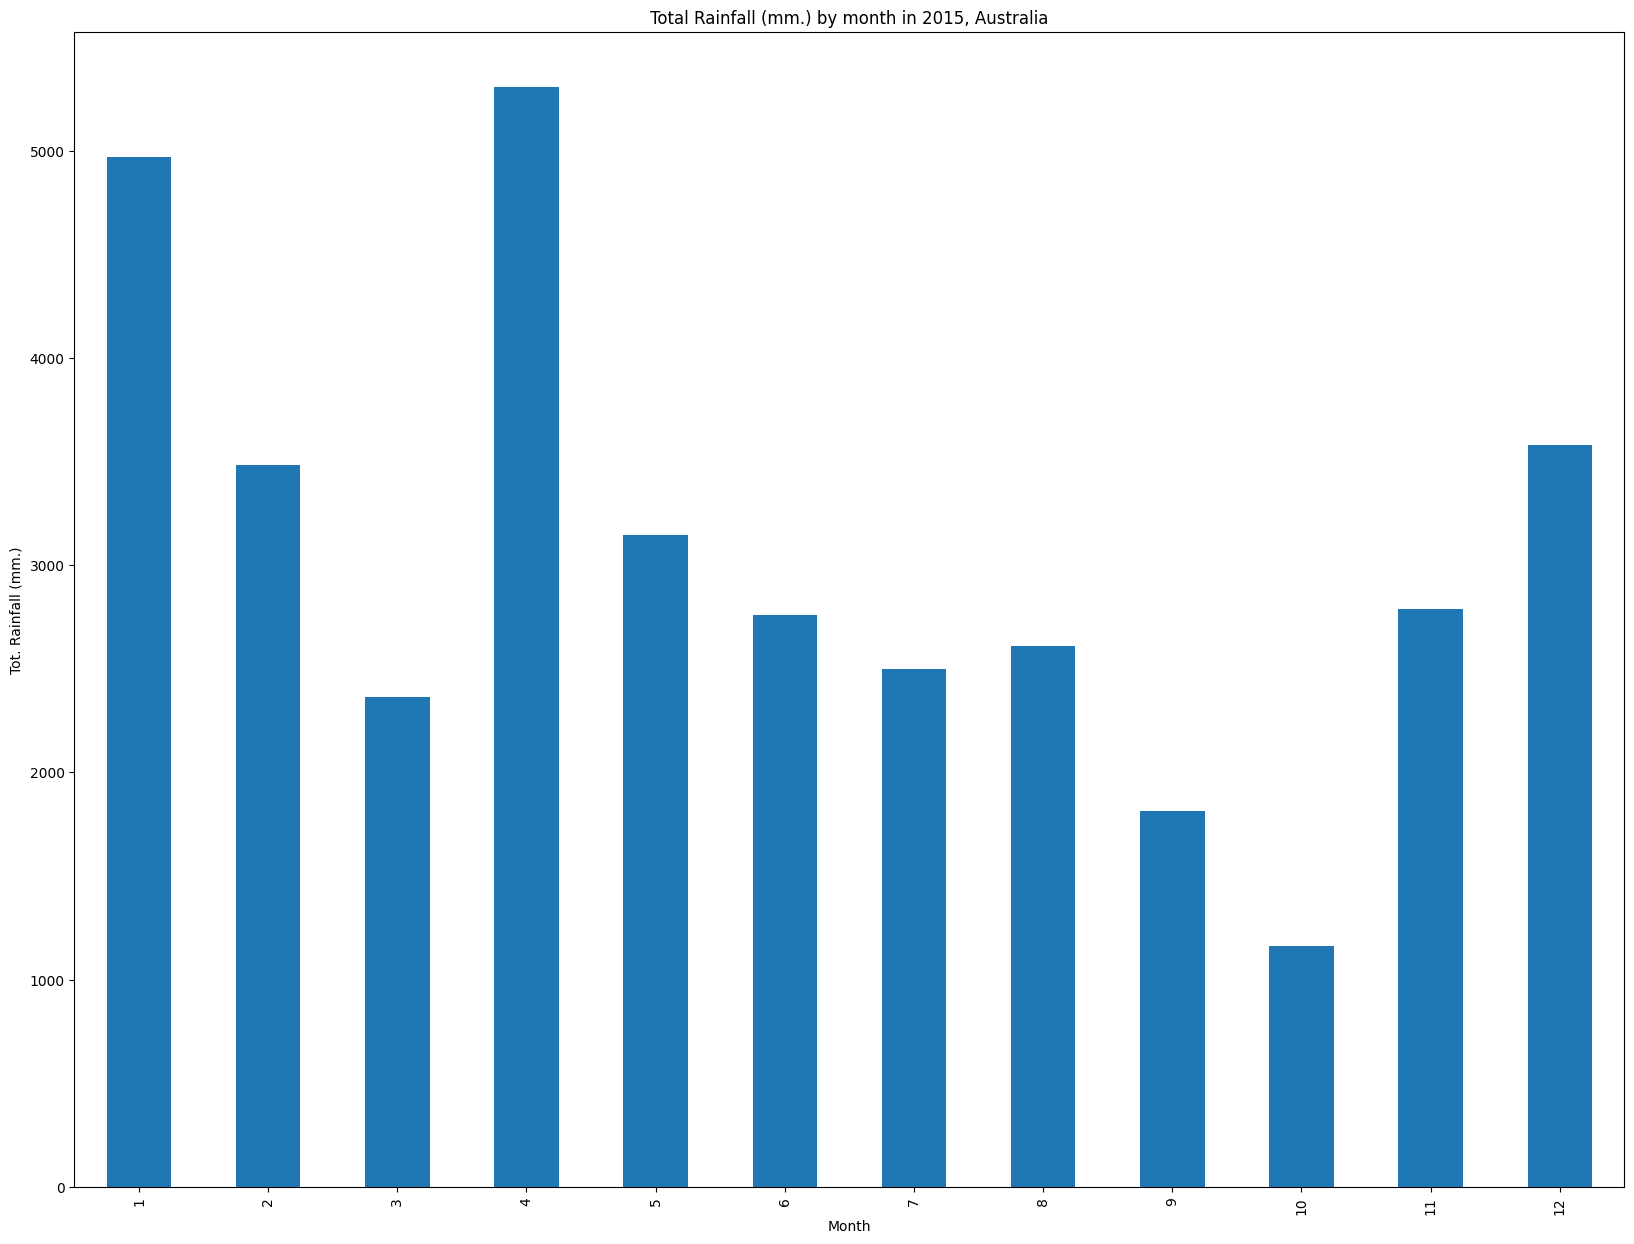

In [ ]:
australia2017 = australia[(australia.index >= "2015-01-01") & (australia.index <= "2015-12-31")]
rainfall_byMonth = []
for month in range(1, 13):
    All_Days_In_Month = australia2017[australia2017.index.month == month]
    rainfall_byMonth.append((All_Days_In_Month['Rainfall'].sum(), month))

df_rainfallmonth = pd.DataFrame(rainfall_byMonth, columns=["Rainfall","Month"]) # turning the list to dataframe

df_rainfallmonth.plot(kind="bar", x="Month", y="Rainfall", title="Total Rainfall (mm.) by month in 2015, Australia", xlabel="Month", ylabel="Tot. Rainfall (mm.)", legend=False, figsize=(20,15))

<Axes: title={'center': 'Temperature based on location, Australia'}, xlabel='Location', ylabel='Temperature (Celsius)'>

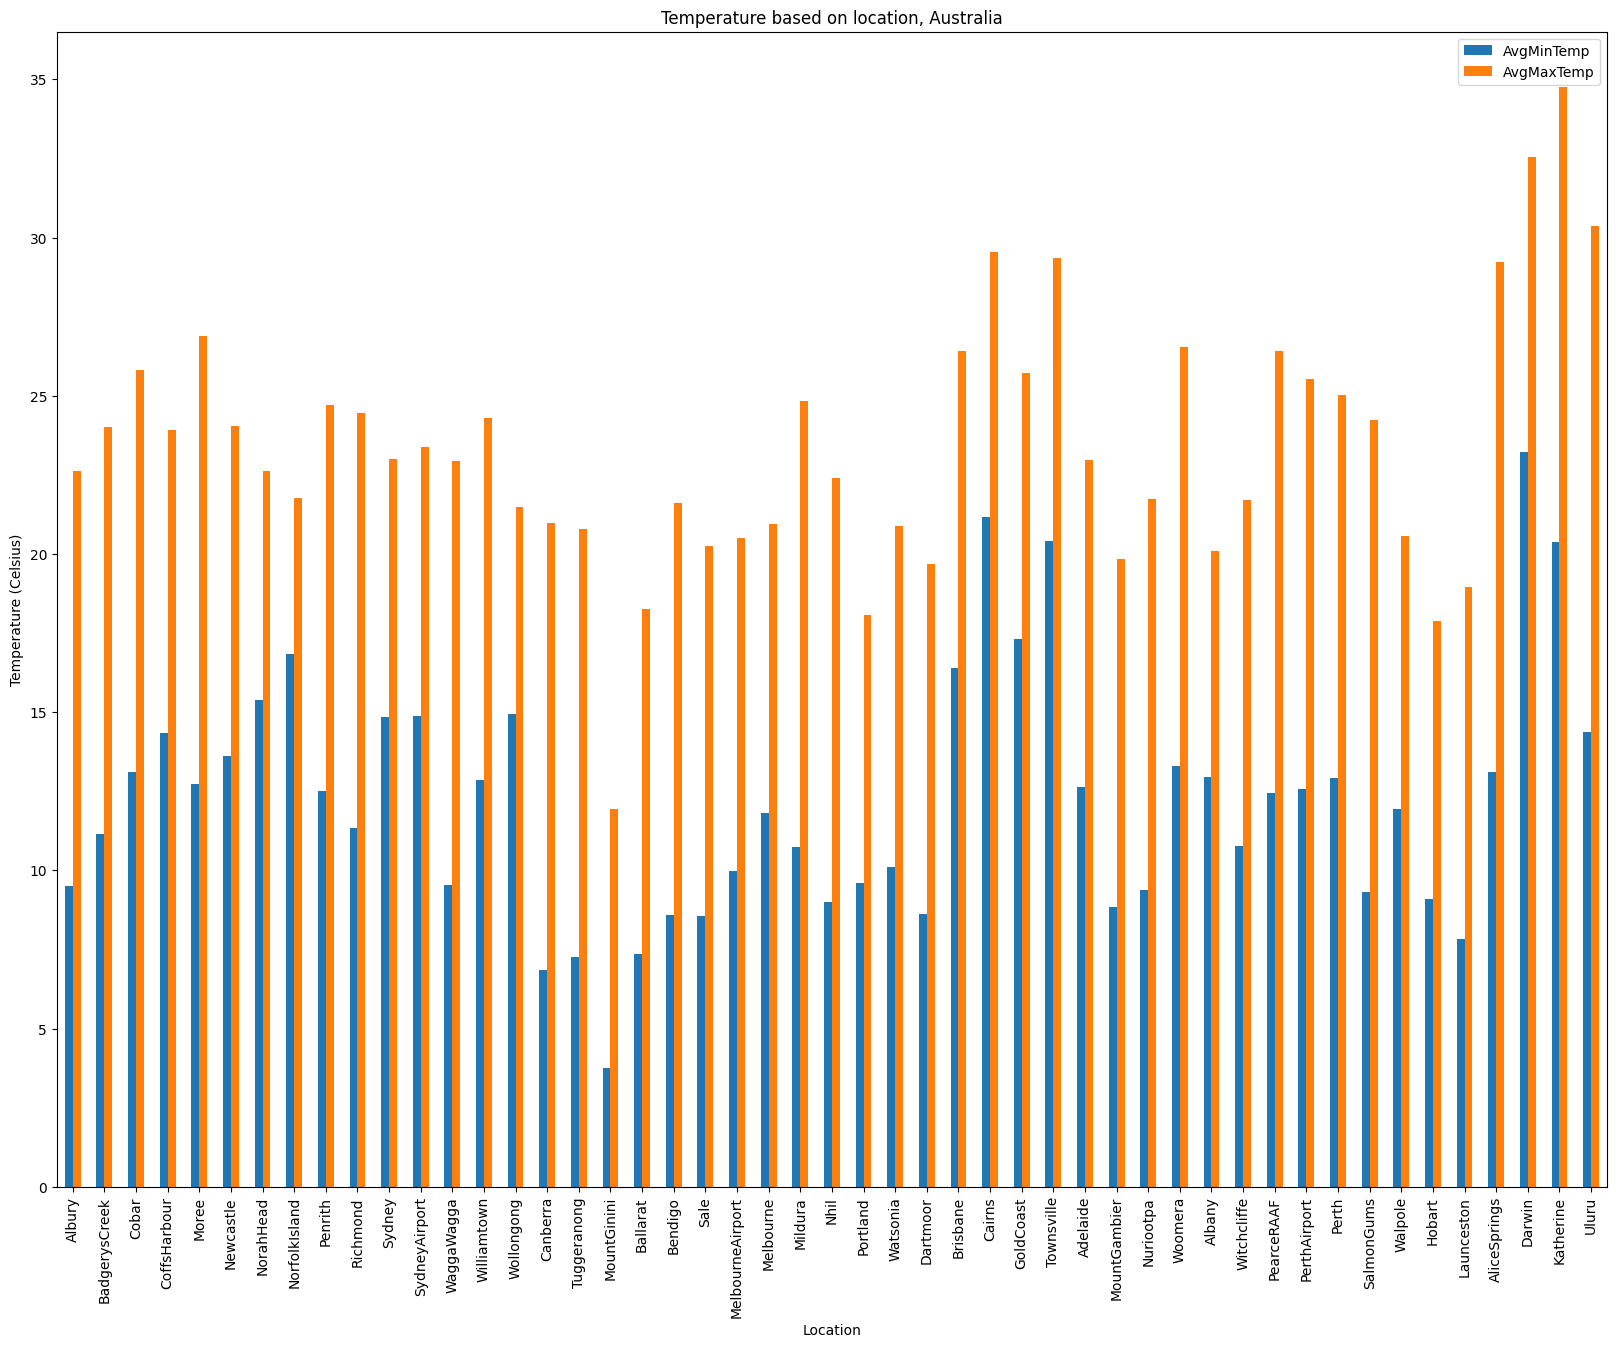

In [ ]:
all_locations_lst = australia.Location.unique()
graph = []
for location in all_locations_lst:
  avgMinTemp = np.average(australia[australia.Location == location].MinTemp)
  avgMaxTemp = np.average(australia[australia.Location == location].MaxTemp)
  graph.append((avgMinTemp, avgMaxTemp, location))

df_graph = pd.DataFrame(graph, columns=["AvgMinTemp", "AvgMaxTemp", "Location"])

df_graph.plot(kind="bar", x="Location", y = ["AvgMinTemp", "AvgMaxTemp"], xlabel = "Location", ylabel = "Temperature (Celsius)", title = "Temperature based on location, Australia", figsize=(20,15))

array([[<Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Temp9am'}>],
       [<Axes: title={'center': 'Temp3pm'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>],
       [<Axes: title={'center': 'WindSpeed3pm'}>, <Axes: >, <Axes: >]],
      dtype=object)

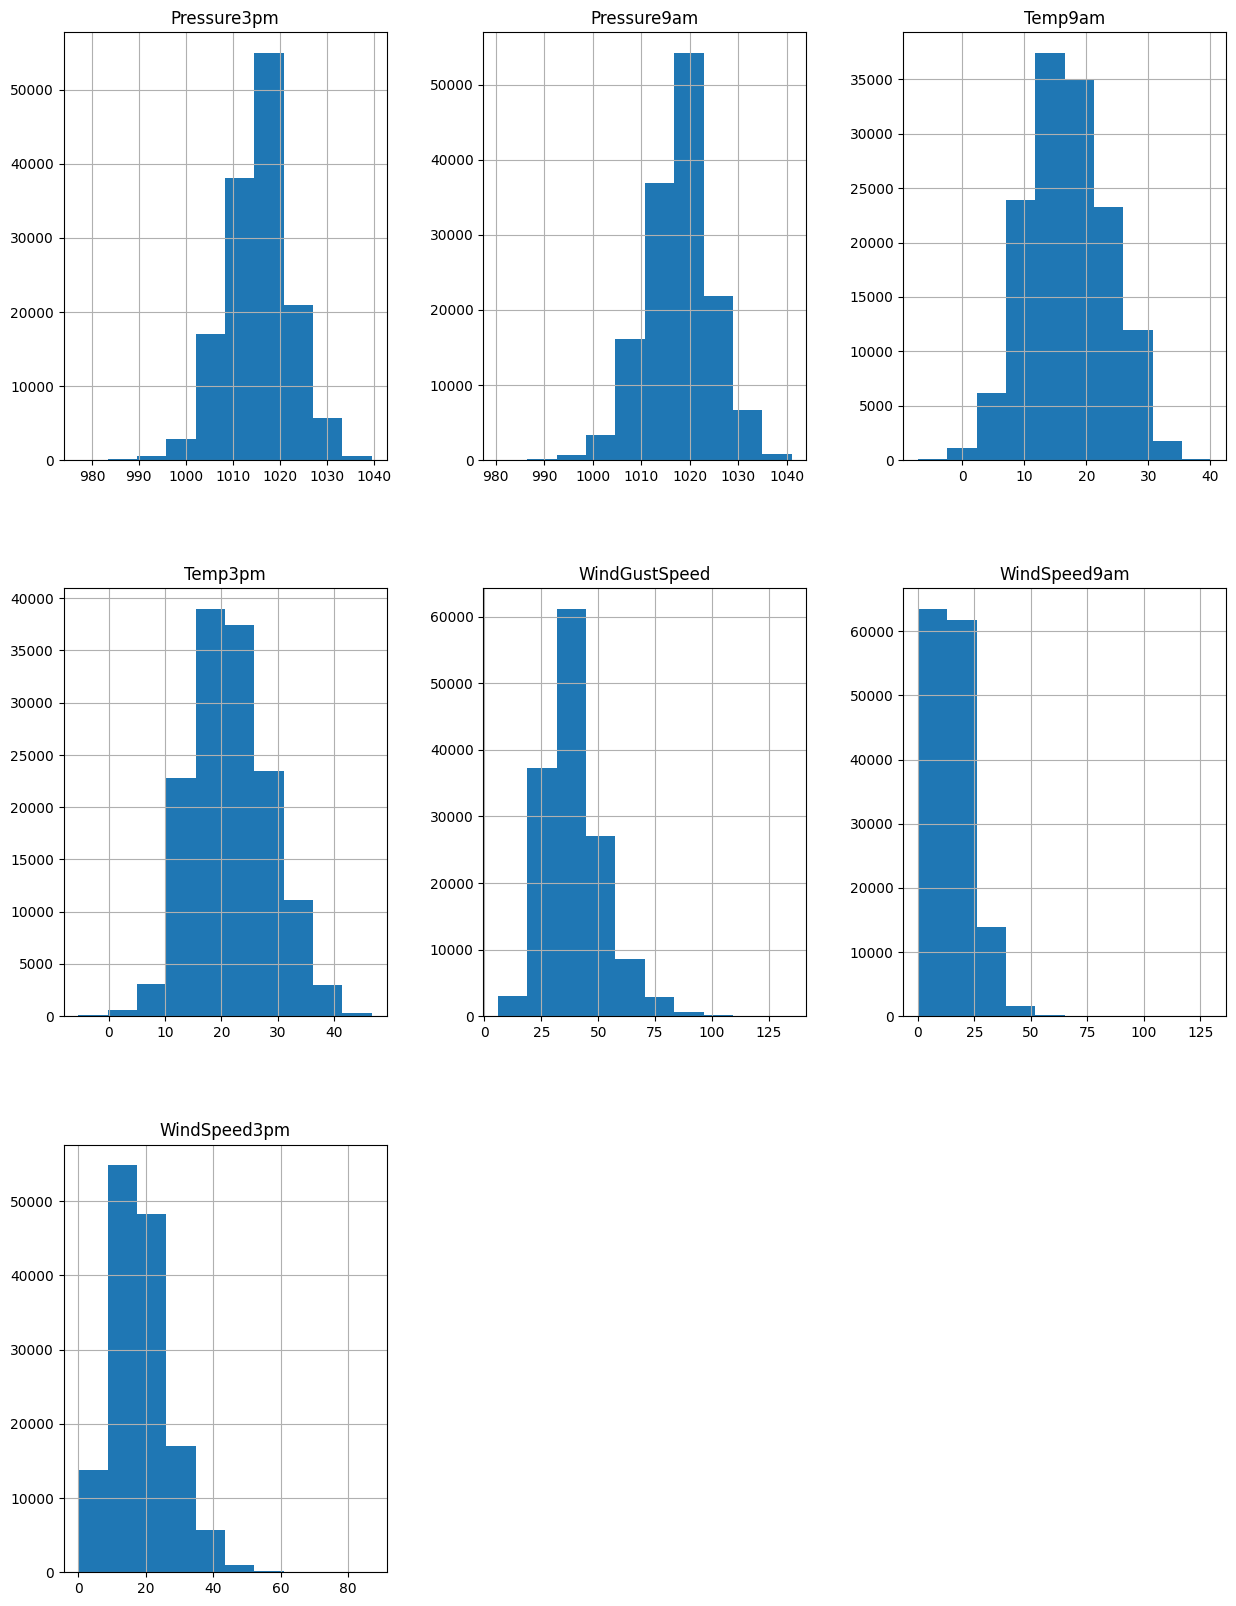

In [ ]:
australia[["Pressure3pm", "Pressure9am", "RainTomorrow", "RainToday", "Temp9am", "Temp3pm", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]].hist(figsize=(15,20))

<Axes: title={'center': 'RainTommorow Percentage'}, ylabel='RainTomorrow'>

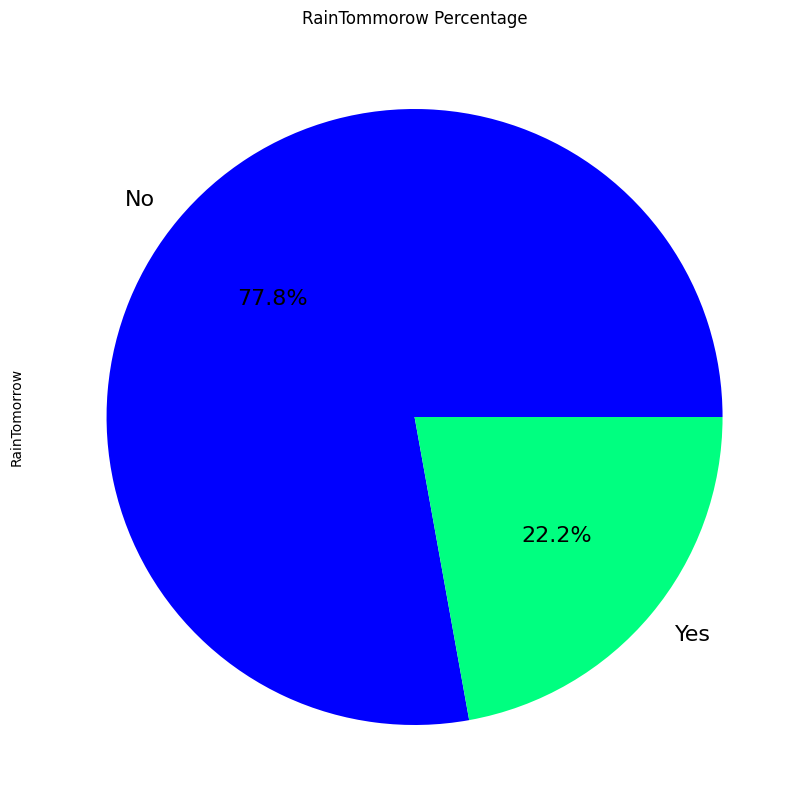

In [ ]:
australia["RainTomorrow"].value_counts().plot.pie(autopct="%.1f%%", colormap = "winter", figsize=(10,10), title = "RainTommorow Percentage", fontsize = 16) # autopct="%.1f%%" - a way to show percentage on graph

<Axes: title={'center': 'Frequency of Wind Gust Directions on Rainy Days in Australia'}, ylabel='WindGustDir'>

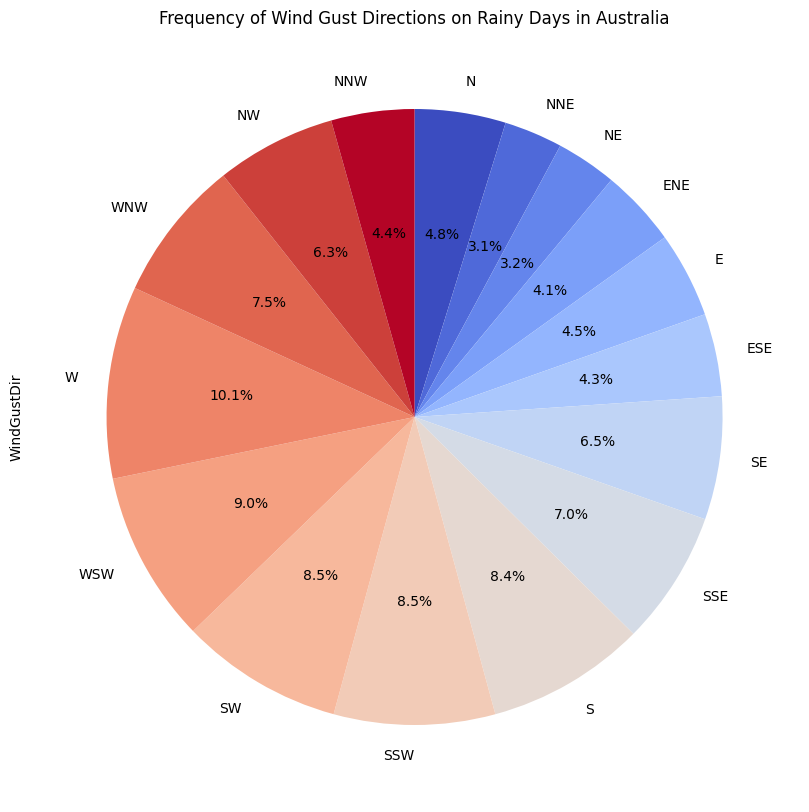

In [ ]:
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
rainyDir = australia[australia.RainToday == "Yes"]["WindGustDir"]

rainyDirCounts = rainyDir.value_counts()[directions] #Organizing it like compass rose (שושנת הרוחות)


rainyDirCounts.plot(kind='pie', figsize=(10, 10), colormap = "coolwarm", startangle=90, counterclock=False, autopct="%.1f%%", title="Frequency of Wind Gust Directions on Rainy Days in Australia")

# Label Encoding

In [ ]:
features = australia.select_dtypes(include="object").drop(labels=['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1) # those I think the One-Hot encoding approach would be more useful
for feature in features:
  australia[feature] = LabelEncoder().fit_transform(australia[feature])
australia.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
Date                                                                          
2008-12-01         2     13.4     22.9       0.6           W           44.0   
2008-12-02         2      7.4     25.1       0.0         WNW           44.0   
2008-12-03         2     12.9     25.7       0.0         WSW           46.0   
2008-12-04         2      9.2     28.0       0.0          NE           24.0   
2008-12-05         2     17.5     32.3       1.0           W           41.0   

           WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Date                                                                        
2008-12-01          W        WNW          20.0          24.0         71.0   
2008-12-02        NNW        WSW           4.0          22.0         44.0   
2008-12-03          W        WSW          19.0          26.0         38.0   
2008-12-04         SE          E          11.0           9.0         45.0   
2008-12-05        ENE         NW           7.0          20.0         82.0   

            Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
Date                                                                  
2008-12-01         22.0       1007.7       1007.1     16.9     21.8   
2008-12-02         25.0       1010.6       1007.8     17.2     24.3   
2008-12-03         30.0       1007.6       1008.7     21.0     23.2   
2008-12-04         16.0       1017.6       1012.8     18.1     26.5   
2008-12-05         33.0       1010.8       1006.0     17.8     29.7   

            RainToday  RainTomorrow  
Date                                 
2008-12-01          0             0  
2008-12-02          0             0  
2008-12-03          0             0  
2008-12-04          0             0  
2008-12-05          0             0

# One Hot Encoding - Wind Directions

In [ ]:
WindGustDir_dummies = pd.get_dummies(australia["WindGustDir"])
WindGustDir_dummies = WindGustDir_dummies.add_suffix("_Gust") # a way to distinguish between all of them

WindDir9am_dummies = pd.get_dummies(australia["WindDir9am"])
WindDir9am_dummies = WindDir9am_dummies.add_suffix("_9am")


WindDir3pm_dummies = pd.get_dummies(australia["WindDir3pm"])
WindDir3pm_dummies = WindDir3pm_dummies.add_suffix("_3pm")

#As an example lets print WindDir3pm_dummies to see what we get:
WindDir3pm_dummies.head()

E_3pm  ENE_3pm  ESE_3pm  N_3pm  NE_3pm  NNE_3pm  NNW_3pm  NW_3pm  \
Date                                                                           
2008-12-01      0        0        0      0       0        0        0       0   
2008-12-02      0        0        0      0       0        0        0       0   
2008-12-03      0        0        0      0       0        0        0       0   
2008-12-04      1        0        0      0       0        0        0       0   
2008-12-05      0        0        0      0       0        0        0       1   

            S_3pm  SE_3pm  SSE_3pm  SSW_3pm  SW_3pm  W_3pm  WNW_3pm  WSW_3pm  
Date                                                                          
2008-12-01      0       0        0        0       0      0        1        0  
2008-12-02      0       0        0        0       0      0        0        1  
2008-12-03      0       0        0        0       0      0        0        1  
2008-12-04      0       0        0        0       0      0        0        0  
2008-12-05      0       0        0        0       0      0        0        0

In [ ]:
# Now after we got the actual sets we will add them and remove the previous columns:
australia.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm"], inplace=True)
australia = pd.concat([australia, WindDir3pm_dummies, WindDir9am_dummies, WindGustDir_dummies], axis = 1)

In [ ]:
#test if it worked:
print(f'australia shape: {australia.shape}')
australia.sample(5)

australia shape: (140787, 63)


Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
Date                                                                            
2013-08-27        45      6.8     22.0       0.0       28.00000          20.0   
2017-06-07        24      9.0     15.5      11.8       39.97052           9.0   
2009-09-01        31      9.0     19.8       1.8       50.00000           9.0   
2016-04-17        36     17.7     29.7       0.0       43.00000          22.0   
2010-02-07        30     19.5     25.4      44.8       30.00000           6.0   

            WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  \
Date                                                             ...   
2013-08-27     15.000000    55.000000    40.000000  1022.200000  ...   
2017-06-07     18.631141    97.000000    51.449288  1017.654577  ...   
2009-09-01     20.000000    75.000000    52.000000  1015.500000  ...   
2016-04-17     15.000000    55.000000    34.000000  1017.654577  ...   
2010-02-07      7.000000    68.826833    94.000000  1017.654577  ...   

            NNW_Gust  NW_Gust  S_Gust  SE_Gust  SSE_Gust  SSW_Gust  SW_Gust  \
Date                                                                          
2013-08-27         0        1       0        0         0         0        0   
2017-06-07         0        0       0        0         0         0        0   
2009-09-01         0        0       0        0         0         0        0   
2016-04-17         0        0       0        0         0         0        0   
2010-02-07         0        0       0        0         0         0        0   

            W_Gust  WNW_Gust  WSW_Gust  
Date                                    
2013-08-27       0         0         0  
2017-06-07       0         0         0  
2009-09-01       0         0         1  
2016-04-17       0         0         0  
2010-02-07       0         0         0  

[5 rows x 63 columns]

# MinMax Scaler

In [ ]:
features_Scale = australia.columns.to_list()
features_Scale.remove("RainTomorrow")

for feature in features_Scale:
  australia[feature] = MinMaxScaler().fit_transform(australia[[feature]])
australia.sample(5)

Location   MinTemp   MaxTemp  Rainfall  WindGustSpeed  \
Date                                                                
2013-09-22  0.979167  0.478774  0.514178  0.000000       0.186047   
2016-09-01  0.395833  0.415094  0.374291  0.002695       0.170543   
2008-12-19  0.000000  0.462264  0.546314  0.000000       0.255814   
2015-12-06  0.208333  0.721698  0.814745  0.000000       0.240310   
2011-02-28  0.437500  0.750000  0.801512  0.000000       0.341085   

            WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Date                                                                            
2013-09-22      0.169231      0.080460         0.43         0.69     0.557025   
2016-09-01      0.069231      0.149425         0.94         0.91     0.634711   
2008-12-19      0.115385      0.195402         0.46         0.29     0.623140   
2015-12-06      0.169231      0.229885         0.15         0.08     0.588430   
2011-02-28      0.153846      0.172414         0.53         0.23     0.510744   

            ...  NNW_Gust  NW_Gust  S_Gust  SE_Gust  SSE_Gust  SSW_Gust  \
Date        ...                                                           
2013-09-22  ...       1.0      0.0     0.0      0.0       0.0       0.0   
2016-09-01  ...       0.0      0.0     0.0      0.0       0.0       1.0   
2008-12-19  ...       0.0      0.0     0.0      0.0       0.0       0.0   
2015-12-06  ...       0.0      0.0     0.0      1.0       0.0       0.0   
2011-02-28  ...       0.0      1.0     0.0      0.0       0.0       0.0   

            SW_Gust  W_Gust  WNW_Gust  WSW_Gust  
Date                                             
2013-09-22      0.0     0.0       0.0       0.0  
2016-09-01      0.0     0.0       0.0       0.0  
2008-12-19      0.0     0.0       0.0       0.0  
2015-12-06      0.0     0.0       0.0       0.0  
2011-02-28      0.0     0.0       0.0       0.0  

[5 rows x 63 columns]

# KNN Model

In [ ]:
#Splitting the Dataset
features = australia.drop('RainTomorrow', axis=1)
label = australia.RainTomorrow
X = features.to_numpy()
y = label.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 14) #We have a lot of data, so i'll split accordingly
print(f'Xtrain = {X_train.shape}, ytrain = {y_train.shape}, Xtest = {X_test.shape}, ytest = {y_test.shape}')

Xtrain = (91511, 62), ytrain = (91511,), Xtest = (49276, 62), ytest = (49276,)


In [ ]:
KNN_Model = KNeighborsClassifier(n_neighbors=5)
KNN_Model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
error = []
for k in range(3, 40,2): # This takes around 7-10 mins to load, so if you don't want to wait that long, set k = 11
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_test)

    returnvalue = (np.mean(predict != y_test), k)
    error.append(returnvalue)

#Graph:
ErrorRate = pd.DataFrame(error, columns = ['Rate', 'k'])
ErrorRate.head()

Rate   k
0  0.207160   3
1  0.200037   5
2  0.197885   7
3  0.196404   9
4  0.195633  11

<Axes: title={'center': 'Error Rate with different k-values'}, xlabel='k', ylabel='Error Rate'>

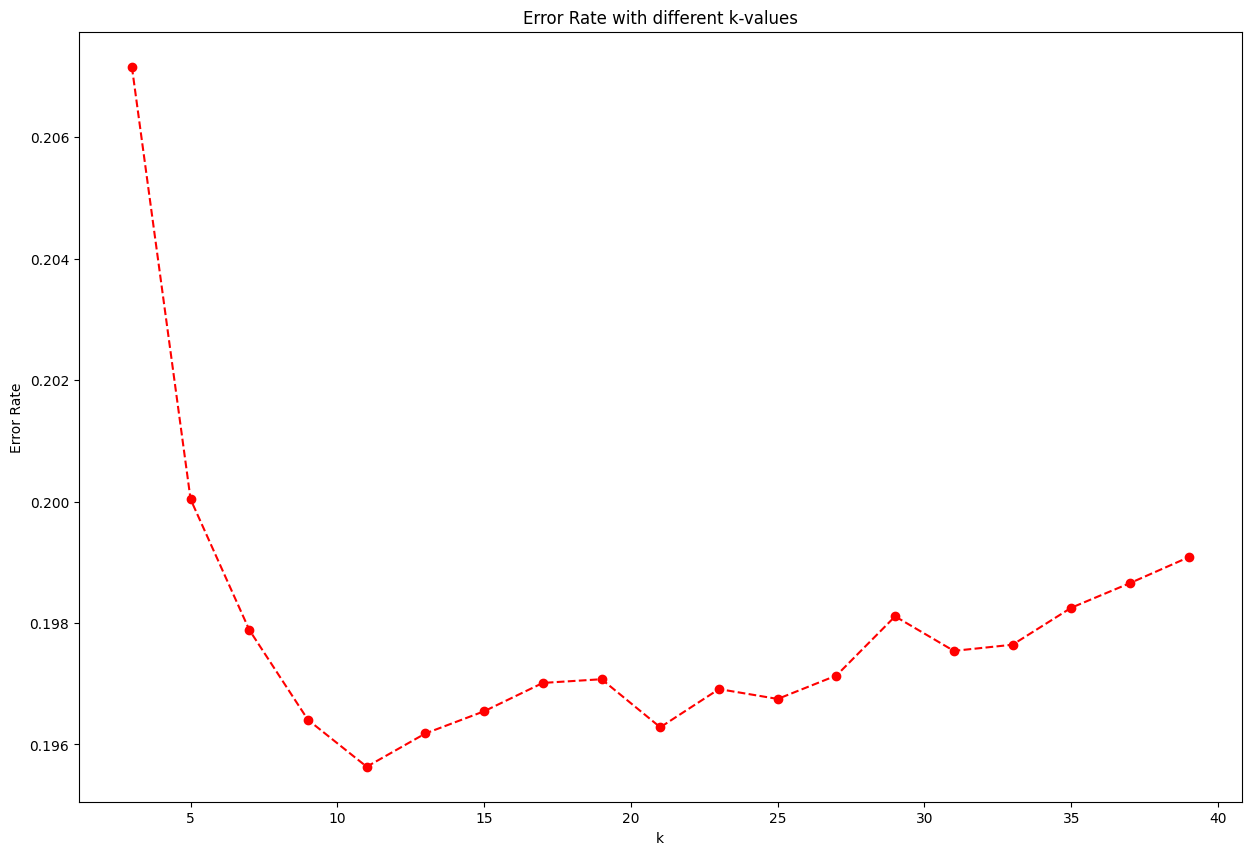

In [ ]:
ErrorRate.plot(kind="line", x = 'k', y = 'Rate', linestyle='--', marker='o', color = 'Red', legend = False, figsize=(15,10), title="Error Rate with different k-values", xlabel="k", ylabel="Error Rate")

In [ ]:
KNN_Model = KNeighborsClassifier(n_neighbors=11)
KNN_Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

# Evaluation

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, predict) * 100}')

Accuracy: 80.09172822469355


In [ ]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[37418,   901],
       [ 8909,  2048]])

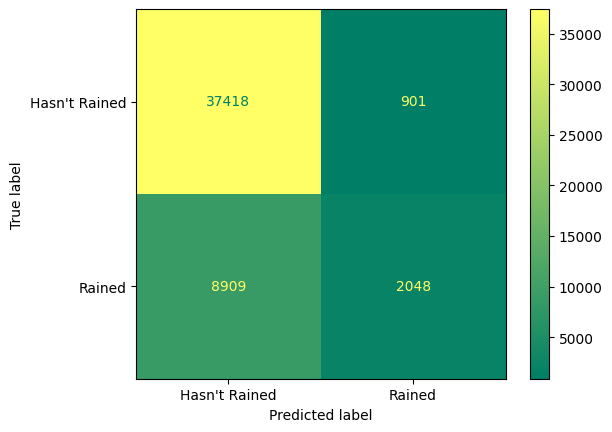

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["Hasn't Rained", "Rained"])

cm_display.plot(cmap = "summer")

In [ ]:
y_pred = KNN_Model.predict(X_test)
print(classification_report(y_test, y_pred)) # 0 - didn't rain, 1 - it has rained

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     38319
           1       0.63      0.29      0.40     10957

    accuracy                           0.80     49276
   macro avg       0.73      0.62      0.64     49276
weighted avg       0.78      0.80      0.78     49276

